This is my approach to linear regression problem. 

In [12]:
import numpy as np
from linear_regression import filename, LinearRegressionModel, StopCondition, RidgeRegressionFunction, Uninomial

model = LinearRegressionModel(filename, normalise=True)
model.set_parameters(loss_function=RidgeRegressionFunction(0), base_function=Uninomial(-0.5))
model.set_parameters(eta=0.0002, stop=0.1, rep_count=100000, condition=StopCondition.Iterations)
model.set_parameters(mini_batch=True, batch_size=16, print_c=100)
model.linear_regression()



100: Gradient: 1570.2022454224355, MSE: 1141131.0871523712
200: Gradient: 1156.102180002706, MSE: 1072000.8945754424
300: Gradient: 2375.74151094641, MSE: 1017229.7135770116
400: Gradient: 2297.402857488482, MSE: 973072.3940904109
500: Gradient: 1900.1933303715, MSE: 933118.2896511139
600: Gradient: 1762.185865466974, MSE: 899106.4768056682
700: Gradient: 2534.2222550582906, MSE: 870016.6741359481
800: Gradient: 1260.0124999155441, MSE: 843245.8046530217
900: Gradient: 1695.3268845582468, MSE: 819649.1943219167
1000: Gradient: 1693.7108105202942, MSE: 797300.5507920656
1100: Gradient: 1356.263222254178, MSE: 776000.2236408066
1200: Gradient: 984.7797528337579, MSE: 757690.4023789123
1300: Gradient: 1344.7637356358005, MSE: 738865.1316378141
1400: Gradient: 1667.7982154611448, MSE: 721655.6539596398
1500: Gradient: 1163.4472447947792, MSE: 704833.3394840448
1600: Gradient: 1035.4584534186693, MSE: 689742.4782160595
1700: Gradient: 817.5524274370107, MSE: 674466.200213375
1800: Gradient:

[np.float64(984.8135313401575),
 np.float64(-140.8053313547926),
 np.float64(2.862267462513406),
 np.float64(1.2923875129103406),
 np.float64(78.37646233000419),
 np.float64(17.633620434038903),
 np.float64(-0.5044908478366454),
 np.float64(9.53559363406019)]

In [54]:
from random import randrange
i = randrange(0, len(model.test) - 1, 1)
p = model.prediction([1, *[model.test[i][j] for j in range(len(model.test[0]) - 1)]])
a = model.test[i][-1]
np.set_printoptions(precision=2)
print(f"prediction: {"%0.2f" %  p}. actual: {"%0.2f" %  a}, error = {"%0.2f" % (abs(p - a) / a * 100)}%")

prediction: 301.82. actual: 1103.46, error = 72.65%


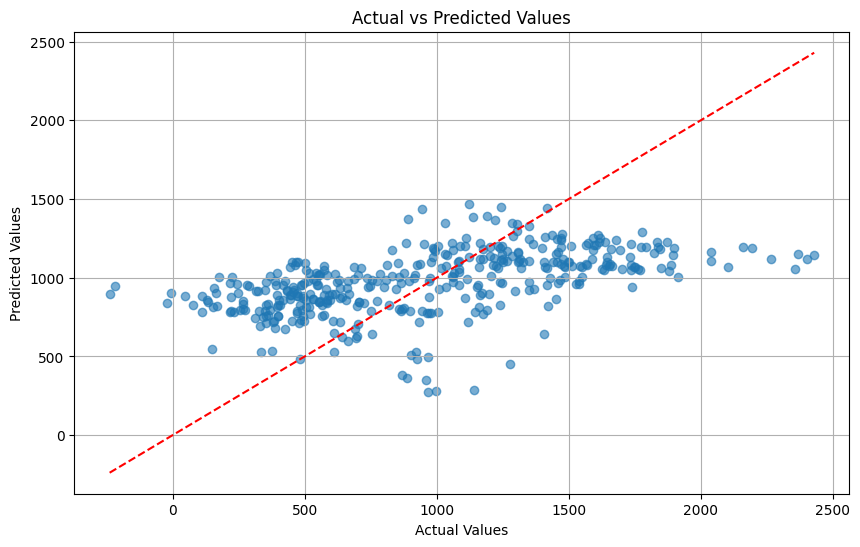

In [13]:

import matplotlib.pyplot as plt

# Assuming 'model' is your trained model and you have test data
data = [(model.prediction([1, *[model.test[k][j] for j in range(len(model.test[0]) - 1)]]), 
         model.test[k][-1]) 
        for k in range(len(model.test))]

# Separate predictions and actual values
predictions = [x[0] for x in data]
actuals = [x[1] for x in data]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(actuals, predictions, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add a reference line for perfect predictions
max_val = max(max(actuals), max(predictions))
min_val = min(min(actuals), min(predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.grid(True)
plt.show()

In [11]:
print(model.MSE())

40158.714487580604


In [4]:
#print(np.mean([quadratic_loss(model, train[i]) ** 2 for i in range(len(train))]))
# print(linear_regression.quadratic_loss(model, test[0]))